In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/drive/MyDrive/PlantDiseaseDataset/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 39134 files belonging to 21 classes.
Found 9783 files belonging to 21 classes.


In [4]:
from tensorflow.keras.applications.densenet import DenseNet201
densenet = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

74850304/74836368 [==============================] - 1s 0us/step


In [5]:
model = keras.Sequential()

model.add(densenet)


# Add new layers
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(21, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 122880)            0         
                                                                 
 batch_normalization (BatchN  (None, 122880)           491520    
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 122880)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 122880)           491520    
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 122880)            0

In [ ]:
ep = 1
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

1223/1223 [==============================] - 4196s 3s/step - loss: 0.2369 - accuracy: 0.9295 - val_loss: 0.0992 - val_accuracy: 0.9734


In [ ]:
model.save('/content/drive/MyDrive/pd_h5/pd_densenet201_1.h5')

In [ ]:
# If want to train more
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_densenet201_1.h5')

In [ ]:
ep = 2
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/2
1223/1223 [==============================] - 1978s 2s/step - loss: 0.0870 - accuracy: 0.9767 - val_loss: 0.1604 - val_accuracy: 0.9656
Epoch 2/2
1223/1223 [==============================] - 1945s 2s/step - loss: 0.0923 - accuracy: 0.9783 - val_loss: 0.0914 - val_accuracy: 0.9780


In [ ]:
model.save('/content/drive/My Drive/pd_h5/pd_densenet201_3.h5')

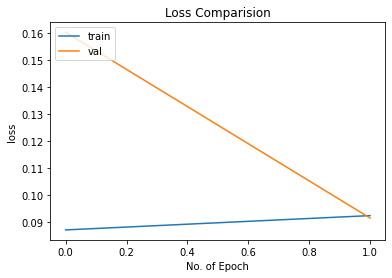

In [ ]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

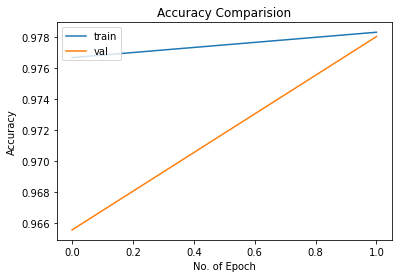

In [ ]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



# **4e - 6e**

In [6]:
model = keras.models.load_model('/content/drive/MyDrive/pd_h5/pd_densenet201_3.h5')

In [16]:
ep = 3
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/3
1223/1223 [==============================] - 5111s 4s/step - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.0927 - val_accuracy: 0.9832
Epoch 2/3
1223/1223 [==============================] - 1901s 2s/step - loss: 0.0949 - accuracy: 0.9814 - val_loss: 0.1730 - val_accuracy: 0.9727
Epoch 3/3
1223/1223 [==============================] - 1898s 2s/step - loss: 0.0653 - accuracy: 0.9869 - val_loss: 0.1336 - val_accuracy: 0.9797


In [17]:
model.save('/content/drive/My Drive/pd_h5/pd_densenet201_6.h5')

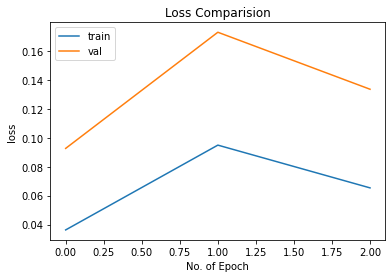

In [18]:
# training and loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('loss')
plt.show()

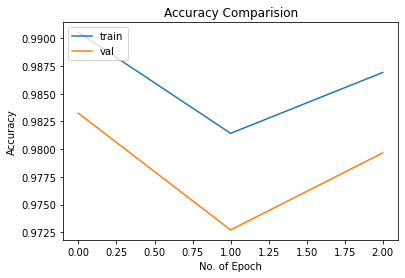

In [19]:
# training and accuracy value
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Comparision')
plt.legend(['train','val'],loc='upper left')
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.show()



# **Model Test**

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  


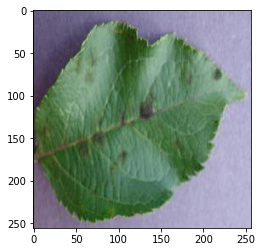

In [21]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/PlantDiseaseDataset/valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG')
img3 = cv2.resize(img,(256,256))
img4 = np.reshape(img3,[1,256,256,3])
plt.imshow(img3)

In [22]:
disease = np.argmax(model.predict(img4),axis=1)
print(disease[0])

1


In [23]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [24]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [25]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.69 %
Test Accuracy   : 97.97 %
Precision Score : 97.97 %
Recall Score    : 97.97 %


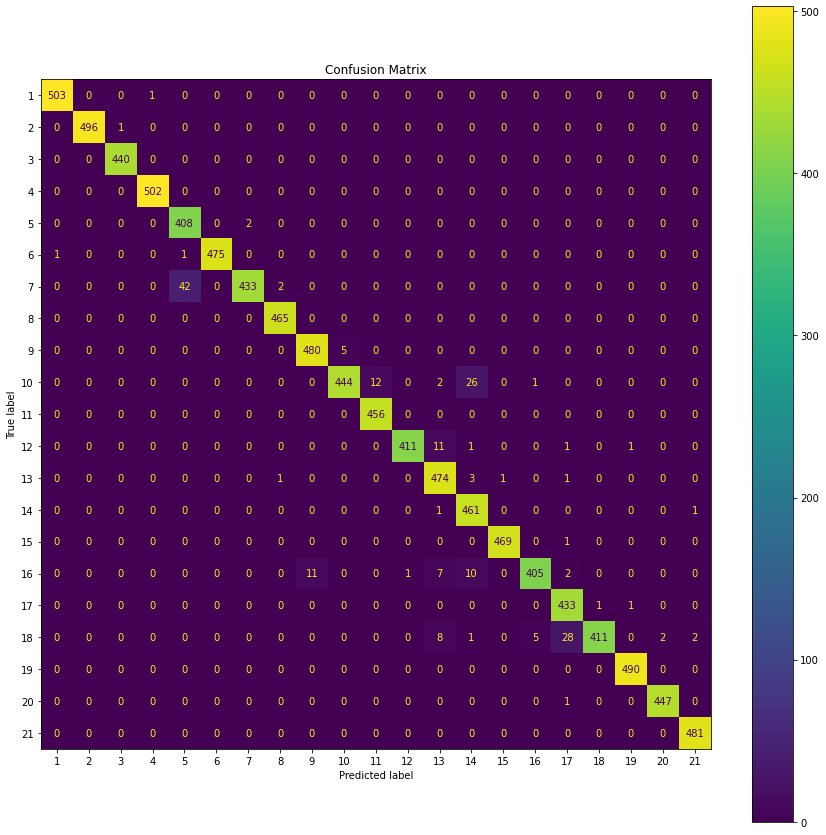

In [26]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

***References***
<br>
https://www.kaggle.com/vishnu0399/leaf-disease-classification-cnn-96-accuracy